In [106]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import scipy.special as special
import math

In [166]:
def RHO(n,rho_mn):
    rho = np . zeros ( (n , n) , dtype=complex )

    for m in range(n):
        for n_ in range(n):
            rho += rho_mn[m, n_] * np.outer(basis_vector(n, m), basis_vector(n, n_).conj())
            rho /= np.trace(rho)
    return rho

def basis_vector(dim, index):

    vec = np.zeros(dim, dtype=complex)
    vec[index] = 1.0
    return vec
def factorial(n):

    if n == 0:
        return 1
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result

def Coherent_states(alpha,n):

    vector_alpha = np.zeros(n, dtype=complex)
    
    for k in range(n):
        coefficient = (alpha**k / np.sqrt(factorial(k))) * np.exp(-0.5 * abs(alpha)**2)
        vector_alpha += coefficient + basis_vector(n,k)


    return vector_alpha

def coherent_density_matrix(alpha,n):
    return np.outer( Coherent_states(alpha,n),Coherent_states(alpha,n).conj())

def anni_op(n):
    a = np.zeros((n, n), dtype=complex)
    for k in range(n - 1):
        a[k + 1, k] = np.sqrt(k + 1)
    return a

def creat_op(n):
    a_dagger = np.zeros((n, n), dtype=complex)
    for k in range(n - 1):
        a_dagger[k, k + 1] = np.sqrt(k + 1)
    return a_dagger

def position_op(a, a_dagger):
    return (a + a_dagger) / np.sqrt(2)

def momentum_op(a, a_dagger):
    return (a - a_dagger) / (1j * np.sqrt(2))

def laguere_polyn(k, alpha,x):

    if k == 0:
        return 1
    elif k==1:
        return 1 - alpha - x 
    
    L_k_minus_1 = 1
    L_k= 1 + alpha - x  
    

    for n in range (k):
        L_k_plus_1 = ((2*n +1 -alpha- x)*L_k - ( n + alpha )*L_k_minus_1)/(n+1)
        L_k_minus_1 = L_k
        L_k = L_k_plus_1
        return L_k
        

# Define the Wigner function
def wigner_function_mn(x, p, m, n):
    X, P = np.meshgrid(x, p, indexing='ij')
    exponent = np.exp(-X**2 - P**2)
    prefactor = (-1)**n * (X - 1j * P)**(m - n) * \
        (np.sqrt(2**(m - n)) * factorial(n) / factorial(m))
    laguerre_poly = laguere_polyn(m, n, 2 * X**2 + 2 * P**2)
    
    Wmn = (1 / np.pi) * exponent * prefactor * laguerre_poly
    return Wmn

def wigner_function(x, p, rho_matrix):
    # Get the number of basis states
    num_states = rho_matrix.shape[0]
    
    # Initialize Wigner function
    W = np.zeros((len(x), len(p)), dtype=np.complex128)
    
    # Compute W(x, p) as a sum over basis states
    for m in range(num_states):
        for n in range(num_states):
            W_mn = wigner_function_mn(x, p, m, n)
            W += rho_matrix[m, n] * W_mn
    
    return W



In [9]:
n= 4  # Dimension of the Hilbert space

rho_mn = np.random.rand(n, n) + 1j * np.random.rand(n, n)

rho = RHO(n, rho_mn)
print("Density Matrix (rho):\n", rho)



Density Matrix (rho):
 [[0.2083614 +0.10321535j 0.73752365+0.51668053j 0.71880287+0.95088597j
  0.8213078 +0.07996323j]
 [0.88382416+0.55084191j 0.49093685+0.41883499j 0.77385532+0.06407891j
  0.68196021+0.89254383j]
 [0.36974373+0.74097681j 0.77563561+0.74691856j 0.68809017+0.66242971j
  0.84224445+0.82506476j]
 [0.23147195+0.01828788j 0.26394056+0.95147609j 0.69712237+0.35675875j
  0.50966537+0.75133022j]]


In [61]:

alpha = 1 + 1j  
n = 10  

vector_alpha = Coherent_states(alpha, n)
print("Coherent State Vector alpha:\n", vector_alpha)

Coherent State Vector alpha:
 [1.08122346+0.9128166j 1.08122346+0.9128166j 1.08122346+0.9128166j
 1.08122346+0.9128166j 1.08122346+0.9128166j 1.08122346+0.9128166j
 1.08122346+0.9128166j 1.08122346+0.9128166j 1.08122346+0.9128166j
 1.08122346+0.9128166j]


[[ 0.28964662+0.00000000e+00j -0.04550618-2.38193919e-02j
   0.0077655 +7.61424354e-02j -0.04330122+4.73519642e-02j]
 [-0.04550618+2.38193919e-02j  0.28242011+0.00000000e+00j
   0.01909958+3.13204608e-02j  0.02073722+6.21561706e-02j]
 [ 0.0077655 -7.61424354e-02j  0.01909958-3.13204608e-02j
   0.20193302-3.46944695e-18j  0.0070719 -8.52437686e-02j]
 [-0.04330122-4.73519642e-02j  0.02073722-6.21561706e-02j
   0.0070719 +8.52437686e-02j  0.22600024+0.00000000e+00j]]
22.1 ms ± 830 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


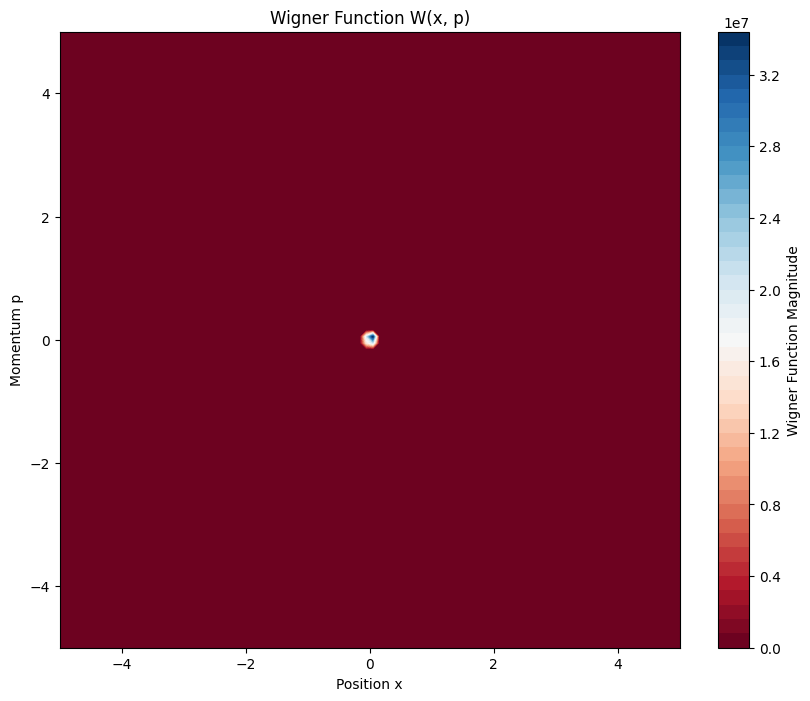

In [181]:
n=10  # Dimension 
rho_mn = np.random.rand(n, n) + 1j * np.random.rand(n, n)
rho_matrix = RHO(n, 5+11*rho_mn)
print(rho)
# Define the grid for position and momentum
x = np.linspace(-5, 5, 100)
p = np.linspace(-5, 5, 100)

# Compute the Wigner function
X, P = np.meshgrid(x, p, indexing='ij')
W = wigner_function(x, p, rho_matrix)
%timeit wigner_function(x, p, rho_matrix)
# Plot the Wigner function
plt.figure(figsize=(10, 8))
plt.contourf(X, P, np.abs(W).T, levels=50, cmap='RdBu')
plt.colorbar(label='Wigner Function Magnitude')
plt.title('Wigner Function W(x, p)')
plt.xlabel('Position x')
plt.ylabel('Momentum p')
plt.show()
